##Syed Aali

Task 5 - Oasis Infobyte - Sales Prediction Using Python

#Importing all the necessary things required


In [185]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn import metrics
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor

In [186]:
df=pd.read_csv("Advertising.csv")

In [187]:
df.head()

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [188]:
df.tail()

,Unnamed: 0,TV,Radio,Newspaper,Sales
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5
199,200,232.1,8.6,8.7,13.4


In [189]:
df.shape

(200, 5)

In [190]:
df.duplicated().sum()

0

In [191]:
df.isnull().sum()

Unnamed: 0    0
TV            0
Radio         0
Newspaper     0
Sales         0
dtype: int64

In [192]:
df.info

<bound method DataFrame.info of      Unnamed: 0     TV  Radio  Newspaper  Sales
0             1  230.1   37.8       69.2   22.1
1             2   44.5   39.3       45.1   10.4
2             3   17.2   45.9       69.3    9.3
3             4  151.5   41.3       58.5   18.5
4             5  180.8   10.8       58.4   12.9
..          ...    ...    ...        ...    ...
195         196   38.2    3.7       13.8    7.6
196         197   94.2    4.9        8.1    9.7
197         198  177.0    9.3        6.4   12.8
198         199  283.6   42.0       66.2   25.5
199         200  232.1    8.6        8.7   13.4

[200 rows x 5 columns]>

In [193]:
df.dtypes

Unnamed: 0      int64
TV            float64
Radio         float64
Newspaper     float64
Sales         float64
dtype: object

In [194]:
df.columns

Index(['Unnamed: 0', 'TV', 'Radio', 'Newspaper', 'Sales'], dtype='object')

In [195]:
df.describe()

,Unnamed: 0,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,147.042500,23.264000,30.554000,14.022500
std,57.879185,85.854236,14.846809,21.778621,5.217457
min,1.000000,0.700000,0.000000,0.300000,1.600000
25%,50.750000,74.375000,9.975000,12.750000,10.375000
50%,100.500000,149.750000,22.900000,25.750000,12.900000
75%,150.250000,218.825000,36.525000,45.100000,17.400000
max,200.000000,296.400000,49.600000,114.000000,27.000000


In [196]:
df = df.drop(columns=['Unnamed: 0'])

##Visualizing the data

<Axes: >

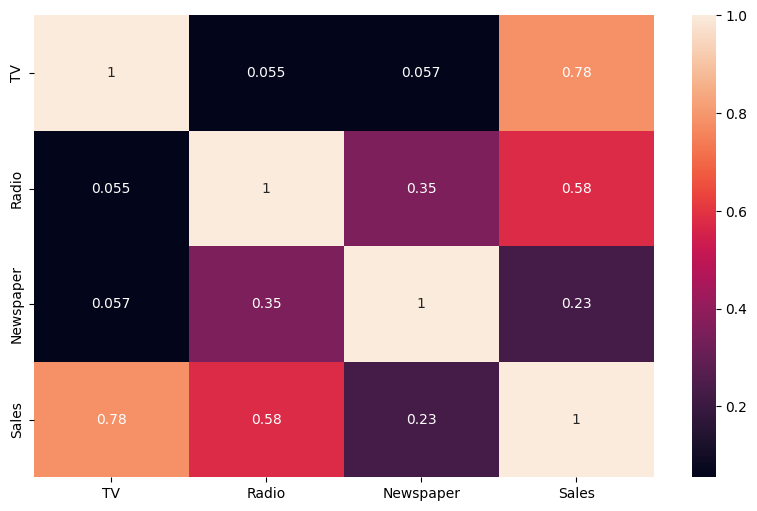

In [197]:
plt.figure(figsize=(10,6))
cor=df.corr()
sns.heatmap(cor,annot=True)

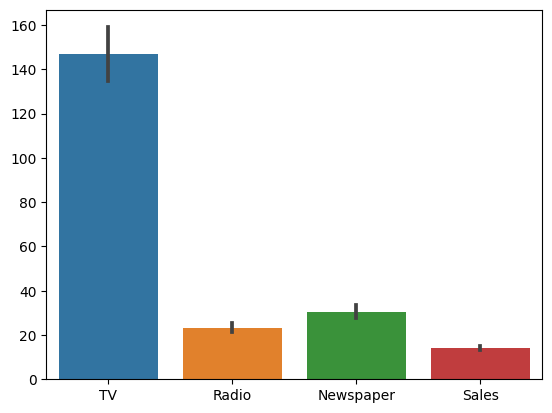

In [198]:
sns.barplot( data = df)
plt.show()

<Axes: >

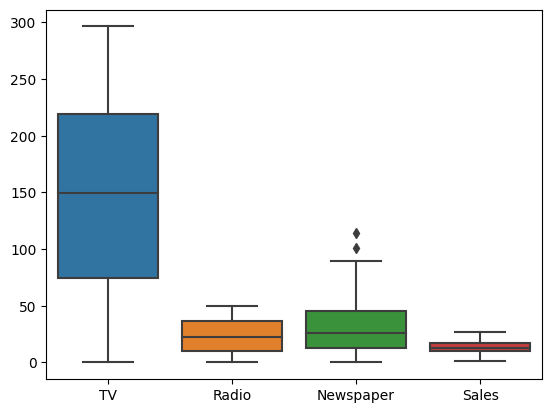

In [199]:
sns.boxplot(data=df)

Since I dont have domain knowledge and there aren't that many outliers, I am not going to remove them


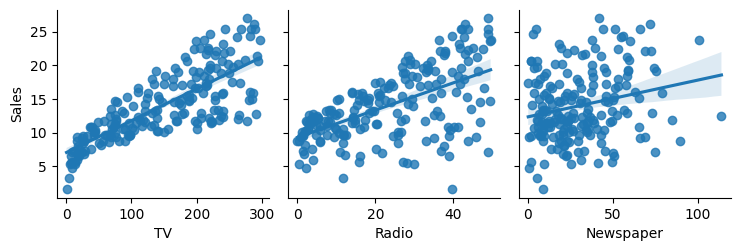

In [200]:
sns.pairplot(df, x_vars=["TV", "Radio", "Newspaper"], y_vars="Sales", kind="reg")

##Preparing Data for Model Training

In [201]:
x=df[['TV','Radio','Newspaper']]
y=df['Sales']

x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.65, random_state=0)

We could also scale and standardize this data.

**Model 1 : Linear Regression**

In [202]:
model=LinearRegression()
model.fit(x_train,y_train)
y_predict=model.predict(x_test)

In [203]:
print("Score of training data: ", model.score(x_train, y_train))
print("Score of test data: ", model.score(x_train, y_train))

Score of training data:  0.9066509899406292
Score of test data:  0.9066509899406292


In [204]:
print('MAE:',metrics.mean_absolute_error(y_predict,y_test))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_predict,y_test)))
print('R-Squared',metrics.r2_score(y_predict,y_test))

MAE: 1.1772969293020834
RMSE: 1.81241485876622
R-Squared 0.8551205457708382


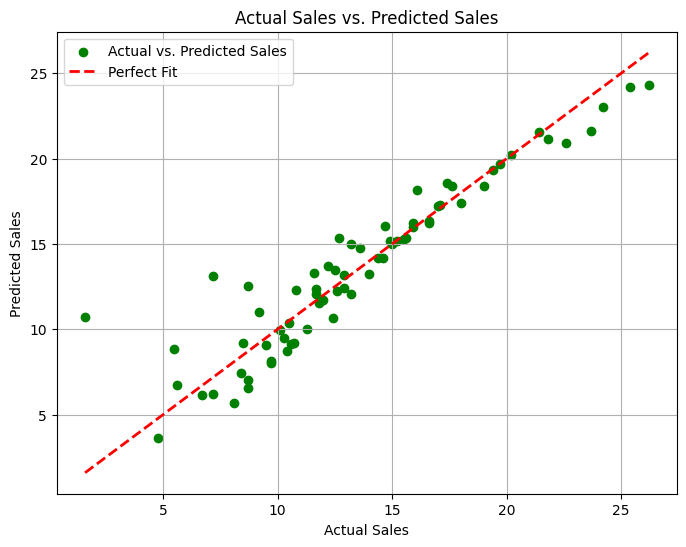

In [205]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_predict, c='green', label='Actual vs. Predicted Sales')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red', linewidth=2, label='Perfect Fit')
plt.xlabel("Actual Sales")
plt.ylabel("Predicted Sales")
plt.title("Actual Sales vs. Predicted Sales")
plt.legend(loc='upper left')
plt.grid(True)
plt.show()

In [206]:
new_data = pd.DataFrame({'TV': [25], 'Radio': [63], 'Newspaper': [80]})
predicted_sales = model.predict(new_data)
print("Predicted Sales:", predicted_sales)

Predicted Sales: [16.62874798]


In [207]:
linear_reg = pd.DataFrame({'actual':y_test, 'predicted': y_predict})
linear_reg = linear_reg.reset_index(drop = True)
linear_reg[:10]

,actual,predicted
0,11.3,10.017078
1,8.4,7.415322
2,8.7,7.005491
3,25.4,24.212379
4,11.7,12.066605
5,8.7,6.571338
6,7.2,13.115410
7,13.2,14.977876
8,9.2,11.040877
9,16.6,16.255128


**Model 2 : Decision Tree Regressor**

In [208]:
model1=DecisionTreeRegressor()
model1.fit(x_train,y_train)
y_pred1=model1.predict(x_test)

In [209]:
print("Score of training data: ", model1.score(x_train, y_train))
print("Score of test data: ", model1.score(x_train, y_train))

Score of training data:  1.0
Score of test data:  1.0


In [210]:
print('MAE:',metrics.mean_absolute_error(y_pred1,y_test))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_pred1,y_test)))
print('R-Squared',metrics.r2_score(y_pred1,y_test))

MAE: 0.994285714285714
RMSE: 1.4331782861877302
R-Squared 0.921579596950638


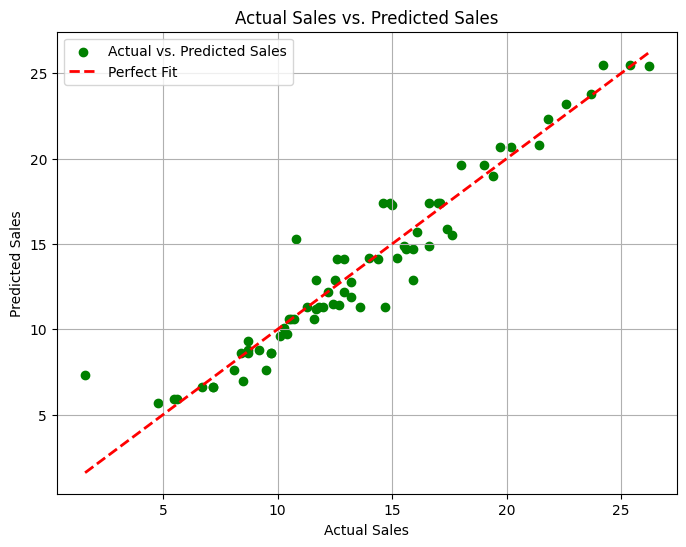

In [211]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred1, c='green', label='Actual vs. Predicted Sales')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red', linewidth=2, label='Perfect Fit')
plt.xlabel("Actual Sales")
plt.ylabel("Predicted Sales")
plt.title("Actual Sales vs. Predicted Sales")
plt.legend(loc='upper left')
plt.grid(True)
plt.show()

In [212]:
new_data = pd.DataFrame({'TV': [25], 'Radio': [63], 'Newspaper': [80]})
predicted_sales = model1.predict(new_data)
print("Predicted Sales:", predicted_sales)

Predicted Sales: [9.3]


In [213]:
decisiontreereg = pd.DataFrame({'actual':y_test, 'predicted': y_pred1})
decisiontreereg = decisiontreereg.reset_index(drop = True)
decisiontreereg[:10]

,actual,predicted
0,11.3,11.3
1,8.4,8.6
2,8.7,8.8
3,25.4,25.5
4,11.7,12.9
5,8.7,8.6
6,7.2,6.6
7,13.2,12.8
8,9.2,8.8
9,16.6,17.4
